In [3]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# use the citipy mod to determine city based on latitude and longitude
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

shache cn
laguna br
thompson ca
mar del plata ar
arraial do cabo br
mataura pf
inirida co
bluff nz
lethem gy
lebu cl
anqing cn
ushuaia ar
shaartuz tj
victoria sc
nizhneyansk ru
busselton au
isla mujeres mx
ushuaia ar
bredasdorp za
bambey sn
tamworth au
vila franca do campo pt
yellowknife ca
trat th
lolua tv
turukhansk ru
kamaishi jp
rikitea pf
busselton au
albany au
rikitea pf
trairi br
tweed ca
belushya guba ru
albany au
albany au
east london za
mataura pf
hilo us
teluknaga id
ushuaia ar
avarua ck
port alfred za
cascavel br
valkeakoski fi
taolanaro mg
ada us
mar del plata ar
busselton au
tebingtinggi id
tasiilaq gl
kidal ml
flinders au
saint-philippe re
kapaa us
longyearbyen sj
hobart au
albany au
hobart au
provideniya ru
lebu cl
dikson ru
morgan city us
kapaa us
busselton au
airai pw
beringovskiy ru
karratha au
taolanaro mg
ati td
vaini to
rikitea pf
mutoko zw
comodoro rivadavia ar
norman wells ca
laguna br
talnakh ru
qaanaaq gl
tigil ru
vao nc
comodoro rivadavia ar
cidreira br
tasii

cape town za
arraial do cabo br
carnarvon au
bethel us
tiksi ru
abapo bo
grand river south east mu
randolph us
tasiilaq gl
sakaraha mg
coihaique cl
mishan cn
busselton au
havre us
hamilton bm
ahipara nz
fuxin cn
logansport us
rikitea pf
abu dhabi ae
bredasdorp za
haapiti pf
airai pw
kiruna se
albany au
rikitea pf
taolanaro mg
east london za
cabo san lucas mx
castro cl
kupang id
sambava mg
mar del plata ar
punta arenas cl
rikitea pf
tsihombe mg
mnogovershinnyy ru
puerto ayora ec
bluff nz
luderitz na
cabo san lucas mx
balud ph
gurskoye ru
mahebourg mu
berlevag no
merauke id
benavente es
namibe ao
tasiilaq gl
cape town za
sahrak af
new norfolk au
kavieng pg
ciudad guayana ve
ushuaia ar
illoqqortoormiut gl
sampit id
puerto ayora ec
nayoro jp
hilo us
victoria sc
touros br
atuona pf
hobart au
emerald au
carnarvon au
hermanus za
port macquarie au
berdigestyakh ru
vila franca do campo pt
troitsko-pechorsk ru
kayiry ua
pevek ru
souillac mu
kodiak us
tuktoyaktuk ca
poladpur in
phulji pk
muisne e

illoqqortoormiut gl
hobart au
gamba ga
tateyama jp
padre paraiso br
hithadhoo mv
kodiak us
adrar dz
ushuaia ar
vaini to
georgetown sh
chuy uy
lavumisa sz
kruisfontein za
rikitea pf
cranbrook ca
thompson ca
kahului us
roma au
albany au
tasiilaq gl
tasiilaq gl
panaba mx
barrow us
mackay au
lerwick gb
taolanaro mg
margate za
teahupoo pf
porto novo cv
taraz kz
bredasdorp za
bluff nz
barentsburg sj
arraial do cabo br
yellowknife ca
fortuna us
puerto ayora ec
lebu cl
nizhneyansk ru
hermanus za
rikitea pf
mae sai th
ushuaia ar
komsomolskiy ru
mataura pf
carnarvon au
vostok ru
sentyabrskiy ru
lasa cn
sakiai lt
rudarpur in
traverse city us
zeya ru
illoqqortoormiut gl
ushuaia ar
chokurdakh ru
erenhot cn
rikitea pf


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [9]:
#import the requests library
import requests
#import the API key
from config import weather_api_key


In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# import the time library and the datetime mod from the datetime library
import time
from datetime import datetime


In [12]:
# Create an empty list to hold the weather data.

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shache
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | inirida
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | lethem
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | anqing
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | shaartuz
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | isla mujeres
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | bambey
Processing Record 20 of Set 1 | tamworth
Processing Record 21 of Set 1 | vila franca do campo
Processing Record 

Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | sumbe
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | strezhevoy
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | opuwo
Processing Record 45 of Set 4 | jacareacanga
Processing Record 46 of Set 4 | trincomalee
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | broome
Processing Record 50 of Set 4 | grand centre
City not found. Skipping...
Processing Record 1 of Set 5 | labrea
Processing Record 2 of Set 5 | taoudenni
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | oro valley
Processing Record 6 of Set 5 | verkhnyaya toyma
Processing Record 7 of Set 5 | cabo san lucas
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | clyde

Processing Record 28 of Set 8 | merauke
Processing Record 29 of Set 8 | benavente
Processing Record 30 of Set 8 | sahrak
City not found. Skipping...
Processing Record 31 of Set 8 | ciudad guayana
Processing Record 32 of Set 8 | nayoro
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | emerald
Processing Record 35 of Set 8 | port macquarie
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | troitsko-pechorsk
Processing Record 38 of Set 8 | kayiry
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | poladpur
Processing Record 41 of Set 8 | phulji
Processing Record 42 of Set 8 | muisne
Processing Record 43 of Set 8 | bolobo
Processing Record 44 of Set 8 | rungata
City not found. Skipping...
Processing Record 45 of Set 8 | araouane
Processing Record 46 of Set 8 | puerto madryn
Processing Record 47 of Set 8 | brae
Processing Record 48 of Set 8 | kattivakkam
Processing Record 49 of Set 8 | pendleton
Processing Record 50 of Set

Processing Record 16 of Set 12 | barbar
City not found. Skipping...
Processing Record 17 of Set 12 | divnogorsk
Processing Record 18 of Set 12 | vanimo
Processing Record 19 of Set 12 | sorland
Processing Record 20 of Set 12 | murud
Processing Record 21 of Set 12 | nemuro
Processing Record 22 of Set 12 | batagay-alyta
Processing Record 23 of Set 12 | rovinj
Processing Record 24 of Set 12 | santa rosa
Processing Record 25 of Set 12 | kandi
Processing Record 26 of Set 12 | merrill
Processing Record 27 of Set 12 | khonuu
City not found. Skipping...
Processing Record 28 of Set 12 | lieksa
Processing Record 29 of Set 12 | nortelandia
Processing Record 30 of Set 12 | calabozo
Processing Record 31 of Set 12 | umm lajj
Processing Record 32 of Set 12 | mao
Processing Record 33 of Set 12 | cinco esquinas
Processing Record 34 of Set 12 | ijaki
City not found. Skipping...
Processing Record 35 of Set 12 | skibotn
Processing Record 36 of Set 12 | atlantic city
Processing Record 37 of Set 12 | marsh h

In [13]:
len(city_data)

579

In [14]:
# convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shache,38.4167,77.2406,66.22,36,21,5.01,CN,2022-05-08 00:15:25
1,Laguna,38.4210,-121.4238,77.95,37,0,5.99,US,2022-05-08 00:15:26
2,Thompson,55.7435,-97.8558,66.36,52,75,4.61,CA,2022-05-08 00:15:27
3,Mar Del Plata,-38.0023,-57.5575,63.88,80,0,12.66,AR,2022-05-08 00:13:14
4,Arraial Do Cabo,-22.9661,-42.0278,72.16,81,49,10.56,BR,2022-05-08 00:15:27
5,Mataura,-46.1927,168.8643,57.47,98,100,0.18,NZ,2022-05-08 00:15:28
6,Inirida,3.8653,-67.9239,73.40,97,66,2.30,CO,2022-05-08 00:15:28
7,Bluff,-46.6000,168.3333,57.79,95,100,6.44,NZ,2022-05-08 00:15:29
8,Lethem,3.3803,-59.7968,77.25,85,100,4.32,GY,2022-05-08 00:15:29
9,Lebu,-37.6167,-73.6500,53.51,93,5,3.83,CL,2022-05-08 00:15:30


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shache,CN,2022-05-08 00:15:25,38.4167,77.2406,66.22,36,21,5.01
1,Laguna,US,2022-05-08 00:15:26,38.4210,-121.4238,77.95,37,0,5.99
2,Thompson,CA,2022-05-08 00:15:27,55.7435,-97.8558,66.36,52,75,4.61
3,Mar Del Plata,AR,2022-05-08 00:13:14,-38.0023,-57.5575,63.88,80,0,12.66
4,Arraial Do Cabo,BR,2022-05-08 00:15:27,-22.9661,-42.0278,72.16,81,49,10.56


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

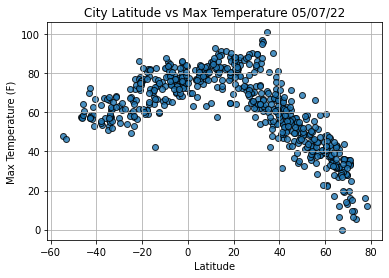

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

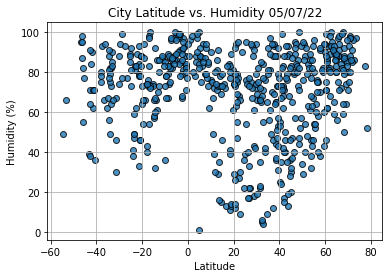

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

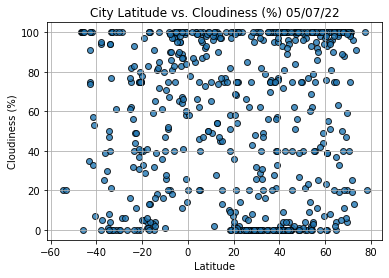

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

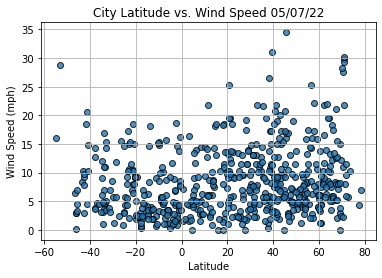

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# import linregress
from scipy.stats import linregress

#create a func to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shache,CN,2022-05-08 00:15:25,38.4167,77.2406,66.22,36,21,5.01
1,Laguna,US,2022-05-08 00:15:26,38.4210,-121.4238,77.95,37,0,5.99
2,Thompson,CA,2022-05-08 00:15:27,55.7435,-97.8558,66.36,52,75,4.61
6,Inirida,CO,2022-05-08 00:15:28,3.8653,-67.9239,73.40,97,66,2.30
8,Lethem,GY,2022-05-08 00:15:29,3.3803,-59.7968,77.25,85,100,4.32


In [33]:
# create northern and southern hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

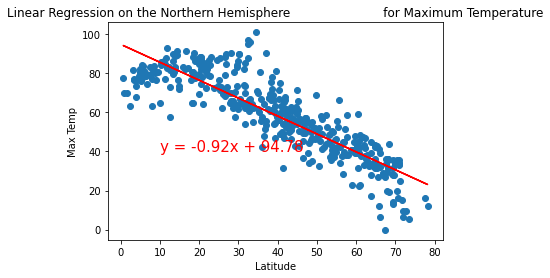

r_value: -0.869889220530143
p_value: 1.307908104965078e-123


In [35]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# call the func
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

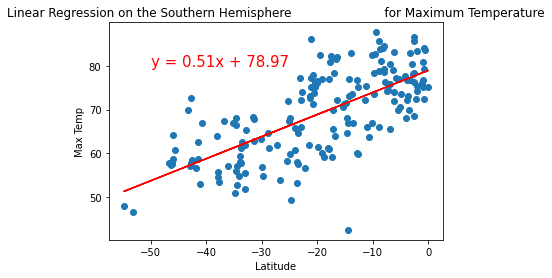

r_value: 0.70193585934707
p_value: 3.518108284230483e-28


In [45]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# call the func
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,80))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.8 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. 

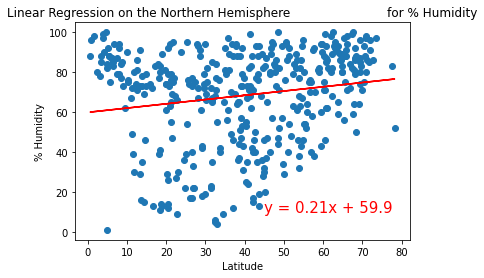

r_value: 0.17601717443622503
p_value: 0.00041860052527556234


In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

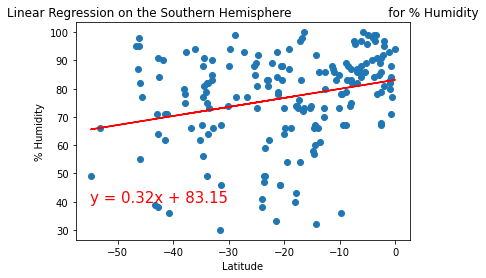

r_value: 0.268494453864977
p_value: 0.00025765061415263635


In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,40))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

The correlation between the latitude and percent humidity is very low because the r-value is less than -0.1 and more than 0.2 for the Northern and Southern Hemispheres, respectively, for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.


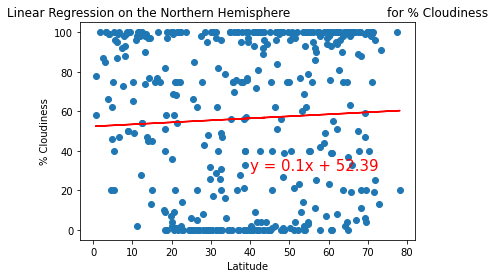

r_value: 0.04946925072836668
p_value: 0.32491534165624103


In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

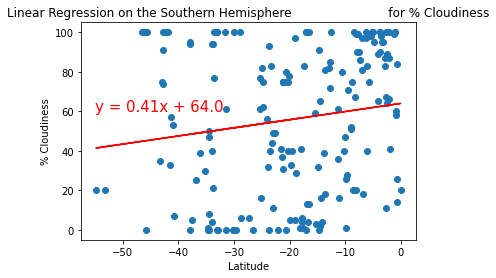

r_value: 0.1536695827541127
p_value: 0.03888768753002495


In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

There seems to be no correlation between the latitude and percent cloudiness because the r-value is 0.05 for the Northern Hemisphere and 0.15 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 

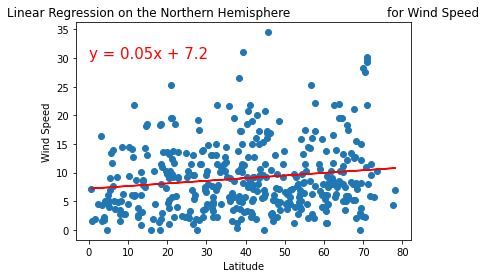

r_value: 0.14921374259682724
p_value: 0.002843532761890436


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,30))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

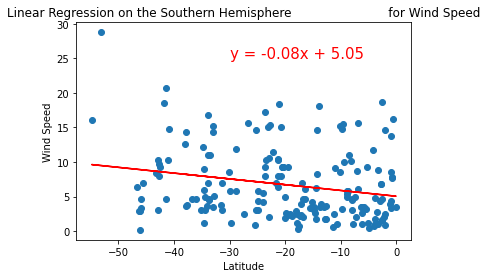

r_value: -0.224531526100815
p_value: 0.0023757735263092885


In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")

The correlation between the latitude and wind speed is very low because the r-value is 0.15 for the Northern Hemisphere and less than –0.2 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 